In [2]:
import pandas as pd
from pytrends.request import TrendReq
import json
import matplotlib.pyplot as plt

In [3]:
#connect to Google
pytrend = TrendReq(hl='en-US', tz=360)

In [8]:
#build payload
#key-word-> it's up to 5 terms(related key words)
etf = ['DIA','SPY','QQQ','IWM','IYR','XHB','ITB','IYT','ITA','IYZ','IHE',
      'IBB','SMH','XLB','XLE','XLF','XLI','XLP','XLU','XLV','XLY']#,'IYC','RTH'
for i in etf:
    pytrend.build_payload(kw_list=[i+' ETF'], cat=0, timeframe='today 5-y', geo='', gprop='')
    if etf.index(i) == 0: #first one
        df = pytrend.interest_over_time() #return dataframe
        #time.sleep(randint(5, 10))
    else:
        df1 = pytrend.interest_over_time()
        df = df.merge(df1[i+' ETF'], on='date')
df.tail() #isPartial is mostly 'False', so ignore here

,DIA ETF,isPartial,SPY ETF,QQQ ETF,IWM ETF,IYR ETF,XHB ETF,ITB ETF,IYT ETF,ITA ETF,...,IBB ETF,SMH ETF,XLB ETF,XLE ETF,XLF ETF,XLI ETF,XLP ETF,XLU ETF,XLV ETF,XLY ETF
date,,,,,,,,,,,,,,,,,,,,,
2019-04-28,15,False,26,58,57,20,0,26,26,9,...,24,49,27,15,27,0,21,0,37,26
2019-05-05,31,False,36,65,33,0,0,0,0,26,...,19,63,27,10,13,23,21,61,14,59
2019-05-12,18,False,38,60,43,0,21,26,0,9,...,24,49,27,19,16,34,49,34,33,59
2019-05-19,23,False,33,54,35,0,0,26,25,13,...,10,62,27,21,13,22,31,80,28,45
2019-05-26,18,True,18,51,0,0,0,0,0,32,...,35,0,98,31,19,0,0,0,100,70


In [9]:
#spy = pytrend.interest_over_time().get('SPY')

In [10]:
#set plot type
plt.rcParams['figure.figsize'] = (15, 5)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False #show minus

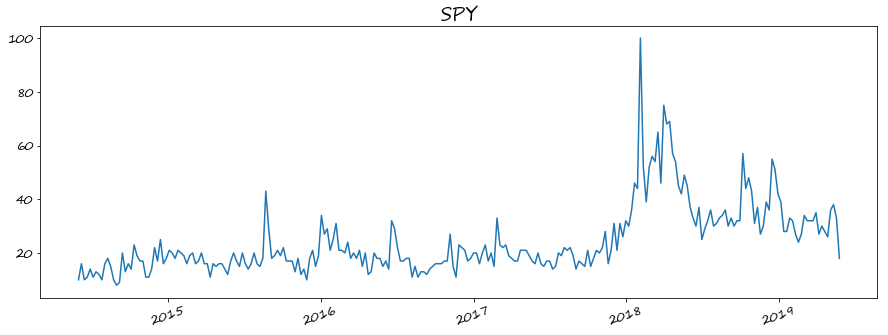

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.title('SPY')
plt.xticks(rotation=20)
plt.plot(df['SPY ETF'])

In [12]:
pytrend.interest_by_region()

,XLY ETF
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


In [13]:
pytrend.related_topics()
pytrend.suggestions('QQQ')

[{'mid': '/m/06z_zz', 'title': 'PowerShares QQQ 300', 'type': 'Topic'}]

In [14]:
preload = json.loads(pytrend.interest_over_time().to_json(orient='table'))['data']
print(json.dumps(preload, ensure_ascii=False))

[{"date": "2014-06-01T00:00:00.000Z", "XLY ETF": 0, "isPartial": "False"}, {"date": "2014-06-08T00:00:00.000Z", "XLY ETF": 0, "isPartial": "False"}, {"date": "2014-06-15T00:00:00.000Z", "XLY ETF": 28, "isPartial": "False"}, {"date": "2014-06-22T00:00:00.000Z", "XLY ETF": 28, "isPartial": "False"}, {"date": "2014-06-29T00:00:00.000Z", "XLY ETF": 58, "isPartial": "False"}, {"date": "2014-07-06T00:00:00.000Z", "XLY ETF": 57, "isPartial": "False"}, {"date": "2014-07-13T00:00:00.000Z", "XLY ETF": 57, "isPartial": "False"}, {"date": "2014-07-20T00:00:00.000Z", "XLY ETF": 29, "isPartial": "False"}, {"date": "2014-07-27T00:00:00.000Z", "XLY ETF": 43, "isPartial": "False"}, {"date": "2014-08-03T00:00:00.000Z", "XLY ETF": 30, "isPartial": "False"}, {"date": "2014-08-10T00:00:00.000Z", "XLY ETF": 28, "isPartial": "False"}, {"date": "2014-08-17T00:00:00.000Z", "XLY ETF": 0, "isPartial": "False"}, {"date": "2014-08-24T00:00:00.000Z", "XLY ETF": 55, "isPartial": "False"}, {"date": "2014-08-31T00:00:

In [15]:
df.to_excel('google_trend.xlsx')

[pytrend.Pypl](https://pypi.org/project/pytrends/)  
[USING GOOGLE TRENDS TO PREDICT APPLE STOCK RETURNS](https://www.mattmoocar.me/AppleStockPred/)  
[Google-Trends-Categories](https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)  
[results-of-pytrends](https://stackoverflow.com/questions/48246083/how-do-i-work-with-the-results-of-pytrends)  
[指數型商品(ETF)代碼總整理](https://www.businessweekly.com.tw/article.aspx?id=8945&type=Blog)  